In [1]:
import numpy as np
import qiskit
from qiskit_experiments.library.characterization import Tphi

# An Aer simulator
from qiskit.providers.fake_provider import FakePerth
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

# Create a pure relaxation noise model for AerSimulator
noise_model = NoiseModel.from_backend(
    FakePerth(), thermal_relaxation=True, gate_error=False, readout_error=False
)

# Create a fake backend simulator
backend = AerSimulator.from_backend(FakePerth(), noise_model=noise_model)

# Time intervals to wait before measurement for t1 and t2
delays_t1 = np.arange(1e-6, 300e-6, 10e-6)
delays_t2 = np.arange(1e-6, 50e-6, 2e-6)

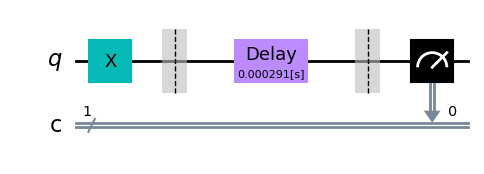

In [2]:
exp = Tphi(physical_qubits=(0,), delays_t1=delays_t1, delays_t2=delays_t2, num_echoes=1)
exp.component_experiment(0).circuits()[-1].draw("mpl")

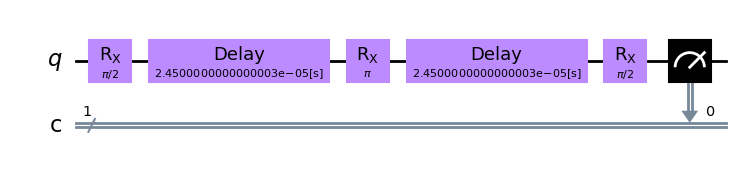

In [3]:
exp.component_experiment(1).circuits()[-1].draw("mpl")

In [4]:
expdata = exp.run(backend=backend, seed_simulator=100).block_for_results()
result = expdata.analysis_results("T_phi")
print(result)

AnalysisResult
- name: T_phi
- value: 0.0003+/-0.0004
- quality: bad
- extra: <1 items>
- device_components: ['Q0']
- verified: False


AnalysisResult
- name: T1
- value: 0.000203+/-0.000010
- χ²: 0.7258623017751399
- quality: good
- extra: <2 items>
- device_components: ['Q0']
- verified: False


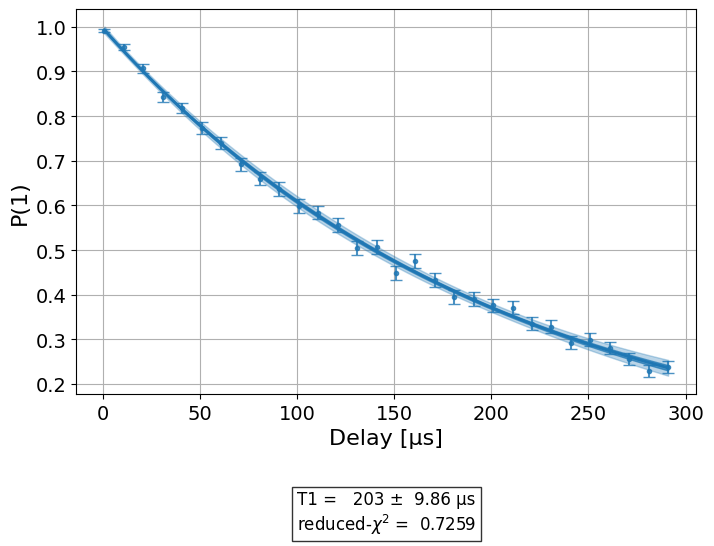

In [5]:
print(expdata.analysis_results("T1"))
display(expdata.figure(0))

AnalysisResult
- name: T2
- value: 0.00018+/-0.00012
- χ²: 1.5168083302533935
- quality: bad
- extra: <2 items>
- device_components: ['Q0']
- verified: False


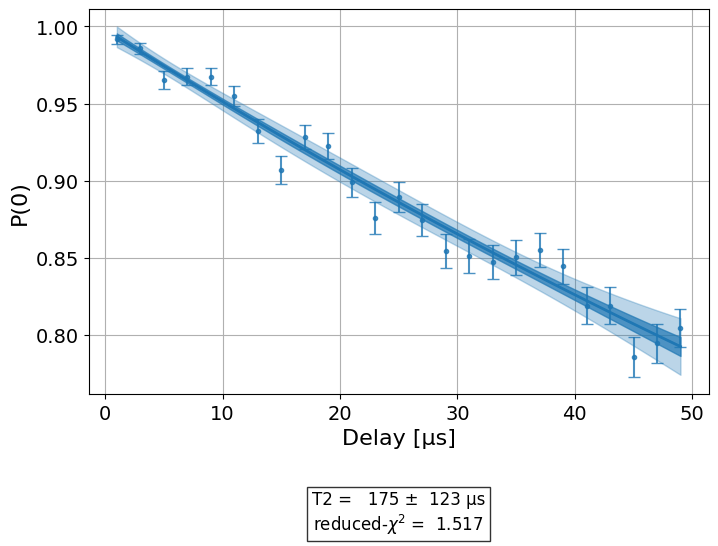

In [6]:
print(expdata.analysis_results("T2"))
display(expdata.figure(1))

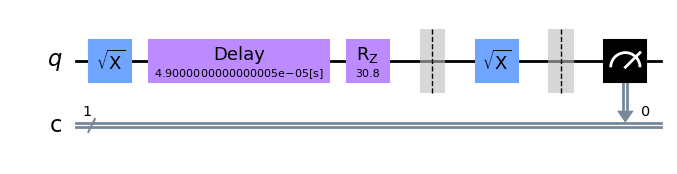

In [7]:
exp = Tphi(physical_qubits=(0,),
           delays_t1=delays_t1,
           delays_t2=delays_t2,
           t2type="ramsey",
           osc_freq=1e5)

exp.component_experiment(1).circuits()[-1].draw("mpl")

AnalysisResult
- name: T_phi
- value: 0.000120+/-0.000008
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False


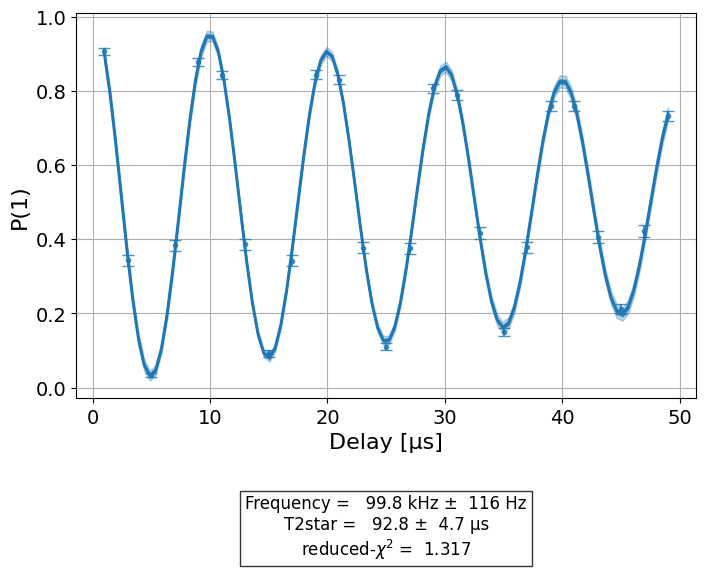

In [8]:
expdata = exp.run(backend=backend, seed_simulator=100).block_for_results()
print(expdata.analysis_results("T_phi"))
display(expdata.figure(1))